<h1>Tidy Tuesdays 1: Novel Corona Virus 2019 Dataset</h1>
notebook by: Franchezka Cruz

In [167]:
import  pandas as pd
import  numpy as np

# Data visualization
import  seaborn as sns
import  matplotlib.pyplot as plt
%matplotlib inline

sns.set_palette("Set1", 8, .75)
sns.set_style("darkgrid")

<h2>Data preparation</h2>

Taking a look at the data:

In [169]:
data = pd.read_csv('covid_19_data.csv')

data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [87]:
data.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
236012,236013,02/27/2021,Zaporizhia Oblast,Ukraine,2021-02-28 05:22:20,69504.0,1132.0,65049.0
236013,236014,02/27/2021,Zeeland,Netherlands,2021-02-28 05:22:20,16480.0,178.0,0.0
236014,236015,02/27/2021,Zhejiang,Mainland China,2021-02-28 05:22:20,1321.0,1.0,1314.0
236015,236016,02/27/2021,Zhytomyr Oblast,Ukraine,2021-02-28 05:22:20,50582.0,834.0,44309.0
236016,236017,02/27/2021,Zuid-Holland,Netherlands,2021-02-28 05:22:20,255335.0,3732.0,0.0


<br>Let's check if there are duplicate records

In [170]:
duplicate = data[data.duplicated()] 
duplicate

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


As we can see, no record has been duplicated!



Number of unique record in the set: 

In [171]:
data.nunique()

SNo                236017
ObservationDate       403
Province/State        737
Country/Region        227
Last Update          2143
Confirmed           78146
Deaths              15099
Recovered           53544
dtype: int64

Number of rows and columns in the dataset:

In [90]:
data.shape

(236017, 8)

In [91]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,236017.000000,2.360170e+05,236017.000000,2.360170e+05
mean,118009.000000,5.715800e+04,1487.719368,3.393027e+04
std,68132.383579,1.834751e+05,4770.414639,1.474800e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,59005.000000,7.270000e+02,9.000000,1.000000e+01
50%,118009.000000,6.695000e+03,127.000000,1.224000e+03
75%,177013.000000,3.349900e+04,880.000000,1.263900e+04
max,236017.000000,3.664050e+06,108208.000000,6.399531e+06


Here is the count of missing values for each column in the dataset: 

In [172]:
# Check null values
null = pd.DataFrame(data.isnull().sum(),columns=['Count of Null Values'])
null['% of Null'] = (null['Count of Null Values'] / data.shape[0]).round(2) # check % 
null

,Count of Null Values,% of Null
SNo,0,0.00
ObservationDate,0,0.00
Province/State,62045,0.26
Country/Region,0,0.00
Last Update,0,0.00
Confirmed,0,0.00
Deaths,0,0.00
Recovered,0,0.00


Though the column for Province/State contains null data, the number of null values is less than 50% so there is no need for us to drop it. The column may still contain relevant information for future analysis.

The column 'Last Update' is not relevant to the data analysis so we could just drop this.

In [173]:
data= data.drop(['Last Update'], axis=1)

In [174]:
data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

Let us check the data type of each column:

In [95]:
data.dtypes #check data type

SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object

Convert the observation date object to date object 

In [175]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'], format='%m/%d/%Y', utc=True)

Remove unnecessary symbols from the Country/Region and Province/State to ensure that all information only contains strings.

In [178]:
#clean strings

#remove special characters
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–",","]

#remove special chars
for char in spec_chars:
    data['Country/Region'] = data['Country/Region'].str.replace(char,'',regex=True)
    data['Province/State'] = data['Province/State'].str.replace(char,'',regex=True)

#remove trailing whitespaces
data['Province/State'] =  data['Province/State'].str.lstrip()
data['Province/State'] =  data['Province/State'].str.rstrip()

data['Country/Region'] =  data['Country/Region'].str.lstrip()
data['Country/Region'] =  data['Country/Region'].str.rstrip()

In [179]:
# Cases (in millions / thousands)
data['Confirmed (in thousands)'] = data['Confirmed'] / 1000
data['Recovered (in thousands)'] = data['Recovered'] / 1000
data['Deaths (in thousands)'] = data['Deaths'] / 1000

Now that we are done with the preparation of data, we can now proceed to data analysis.

<h2>Data Analysis</h2>

<h3>Summary of Worldwide COVID-19 Cases Overtime</h3>

To summarize the dataset, let us group these based on the observation date.

In [186]:
#group by date
groupdate=data.groupby(["ObservationDate"]).agg({"Confirmed (in thousands)":'sum',"Recovered (in thousands)":'sum',"Deaths (in thousands)":'sum'})

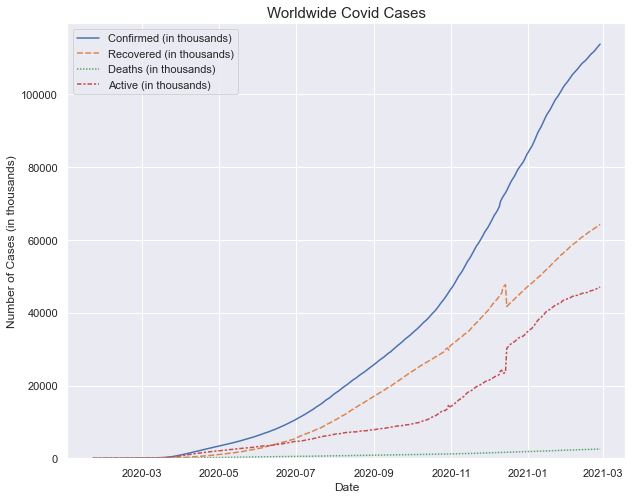

In [191]:
#summary of data
fig = sns.lineplot(data=groupdate)
fig1 = fig.set_ylabel("Number of Cases (in thousands)")
fig1 = fig.set_xlabel("Date")
fig1 = fig.set_ylim(ymin=0)
fig1 = fig.set_title("Worldwide Covid Cases",fontsize=15)

From the graph above, we could see that the number of recovered cases is more than the number of death cases overtime. We will be taking a closer look at these graphs one by one in the next sections.

<h4>Total number of Confirmed Cases Around the World</h4>

Text(0.5, 1.0, 'Confirmed Cases Around the World')

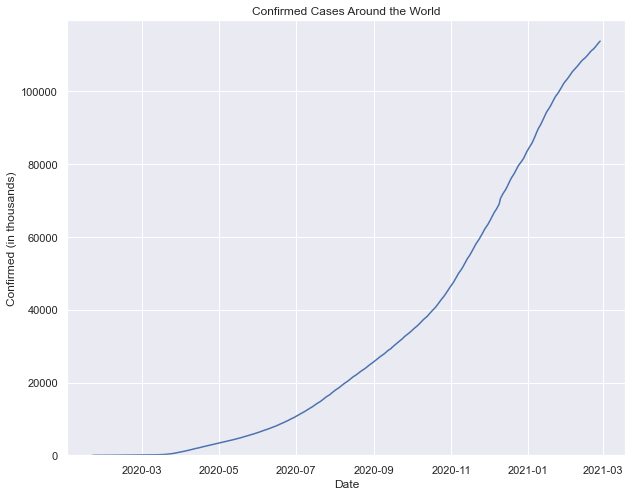

In [190]:
# get total number of confirmed cases
#print('Total number of Confirmed cases around the world: %s' % groupdate["Confirmed"].iloc[-1])

#graph the data
fig = sns.lineplot(data=groupdate["Confirmed (in thousands)"] )
sns.set(rc={'figure.figsize':(10,8)})
fig.set_xlabel("Date")
fig.set_ylim(ymin=0)
fig.set_title("Confirmed Cases Around the World")

As we can see on the graph, the rate of change (slope) of the graph is still high despite the virus being around for a year already. This could mean that there are still lots of countries that cannot control the spread of the virus.

<h4>Total number of Active Cases Around the World</h4>

Total number of Active cases around the world: 47016.04899999989


Text(0.5, 1.0, 'Active Cases Around the World')

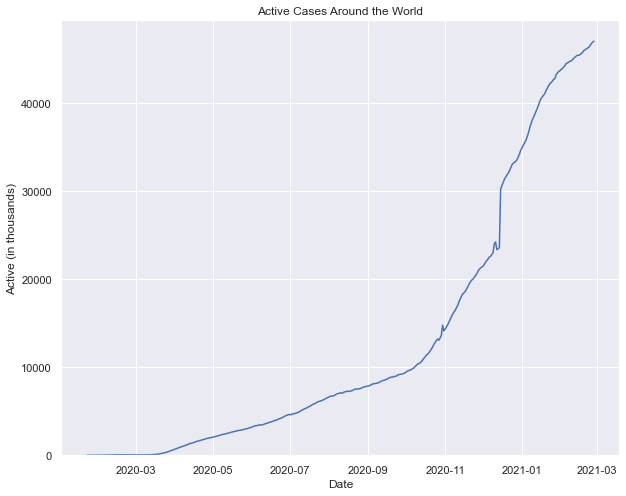

In [189]:
# get total number of active cases

groupdate["Active (in thousands)"] = groupdate["Confirmed (in thousands)"]-groupdate["Recovered (in thousands)"]-groupdate["Deaths (in thousands)"]
print('Total number of Active cases around the world: %s' % groupdate["Active (in thousands)"].iloc[-1])

#graph the data
fig = sns.lineplot(data=groupdate["Active (in thousands)"], x=groupdate.index, y=groupdate["Active (in thousands)"])
sns.set(rc={'figure.figsize':(10,8)})
fig.set_ylabel("Active (in thousands)")
fig.set_xlabel("Date")
fig.set_ylim(ymin=0)
fig.set_title("Active Cases Around the World")

From the graph above, we could see that the highest increase of the number of active cases was from November 2020 to January 2021. One of the factors that could have affected the rate of change is the holiday season.

<h4>Total number of Recovered Cases Around the World</h4>

Total number of Recovered cases around the world: 64243.285000000054


Text(0.5, 1.0, 'Recovered Cases Around the World')

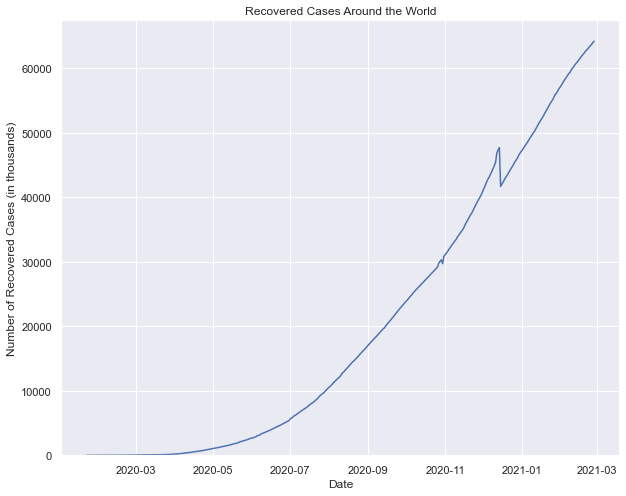

In [118]:
# get total number of recovered cases
print('Total number of Recovered cases around the world: %s' % groupdate["Recovered (in thousands)"].iloc[-1])

#graph the data
fig = sns.lineplot(data=groupdate["Recovered (in thousands)"], x=groupdate.index, y=groupdate["Recovered (in thousands)"])
sns.set(rc={'figure.figsize':(10,8)})
fig.set_ylabel("Number of Recovered Cases (in thousands)")
fig.set_xlabel("Date")
fig.set_ylim(ymin=0)
fig.set_title("Recovered Cases Around the World")

The number of recovered cases has been steadily increasing except between December 2020 and January 2021, wherein the number of recovered cases dropped for a while.

<h4>Total number of Deaths Around the World</h4>

Total number of Death cases around the world: 2525.400999999998


Text(0.5, 1.0, 'Deaths Around the World')

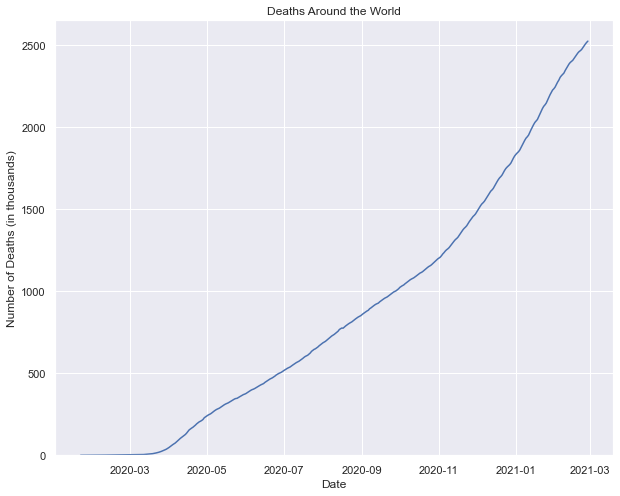

In [119]:
# get total number of deaths
print('Total number of Death cases around the world: %s' % groupdate["Deaths (in thousands)"].iloc[-1])

#graph the data
fig = sns.lineplot(data=groupdate["Deaths (in thousands)"], x=groupdate.index, y=groupdate["Deaths (in thousands)"])
sns.set(rc={'figure.figsize':(10,8)})
fig.set_ylabel("Number of Deaths (in thousands)")
fig.set_xlabel("Date")
fig.set_ylim(ymin=0)
fig.set_title("Deaths Around the World")

The number of deaths around the world due to the virus is steadily increasing.

<h4>Total Number of Cases for Each Country </h4>

In [143]:
# group data per country
country= data.groupby(['Country/Region']).agg({"Confirmed (in thousands)":'sum',"Recovered (in thousands)":'sum',"Deaths (in thousands)":'sum'})
country = country.reset_index().sort_values(by=['Confirmed (in thousands)'],ascending=False)

#compute for the death percent in each country
country["DeathPercent"]=country["Deaths (in thousands)"]/country["Confirmed (in thousands)"]*100

#compute for the recovery rate in each country
country["RecoveryPercent"]=country["Recovered (in thousands)"]/country["Confirmed (in thousands)"]*100
# sum of cases per country
sum_country= country.groupby(['Country/Region']).tail(1)
sum_country= sum_country.reset_index()
sum_country

,index,Country/Region,Confirmed (in thousands),Recovered (in thousands),Deaths (in thousands),DeathPercent,RecoveryPercent
0,210,US,3201291.312,503370.956,72223.040,2.256060,15.723997
1,93,India,1705855.807,1553542.507,26087.127,1.529269,91.071150
2,25,Brazil,1417934.579,1223330.101,40013.970,2.821990,86.275497
3,168,Russia,511040.684,406002.541,9066.743,1.774172,79.446227
4,68,France,395738.242,39749.892,13676.000,3.455820,10.044491
...,...,...,...,...,...,...,...
220,148,North Ireland,0.001,0.000,0.000,0.000000,0.000000
221,165,Republic of the Congo,0.001,0.000,0.000,0.000000,0.000000
222,203,The Gambia,0.001,0.000,0.000,0.000000,0.000000
223,39,Channel Islands,0.001,0.000,0.000,0.000000,0.000000


<h2>Data Visualization</h2>

Now that we have the total number of cases per country, we can now get the countries with the most number of cases.

<h4>Countries with Highest COVID-19 Caes</h4>

In [148]:
#get the top 10 countries
top_country = country.head(10)
top_country_list = top_country['Country/Region'].to_list()

top_country_data = data[data['Country/Region'].isin(top_country_list)].drop(columns=['Confirmed','Deaths','Recovered', 'SNo'])
top_country_agg = top_country_data.groupby(['Country/Region','ObservationDate']).sum().reset_index().set_index('ObservationDate')
top_country

,Country/Region,Confirmed (in thousands),Recovered (in thousands),Deaths (in thousands),DeathPercent,RecoveryPercent
210,US,3201291.312,503370.956,72223.040,2.256060,15.723997
93,India,1705855.807,1553542.507,26087.127,1.529269,91.071150
25,Brazil,1417934.579,1223330.101,40013.970,2.821990,86.275497
168,Russia,511040.684,406002.541,9066.743,1.774172,79.446227
68,France,395738.242,39749.892,13676.000,3.455820,10.044491
209,UK,385499.227,1082.499,17619.785,4.570641,0.280804
190,Spain,340195.388,47509.402,12140.448,3.568669,13.965328
99,Italy,297719.949,200715.411,15638.400,5.252722,67.417522
41,Colombia,272628.329,239986.639,7636.744,2.801156,88.027037
6,Argentina,258275.331,219372.611,6570.698,2.544067,84.937501


Text(0.5, 0, 'Confirmed Cases (in thousands)')

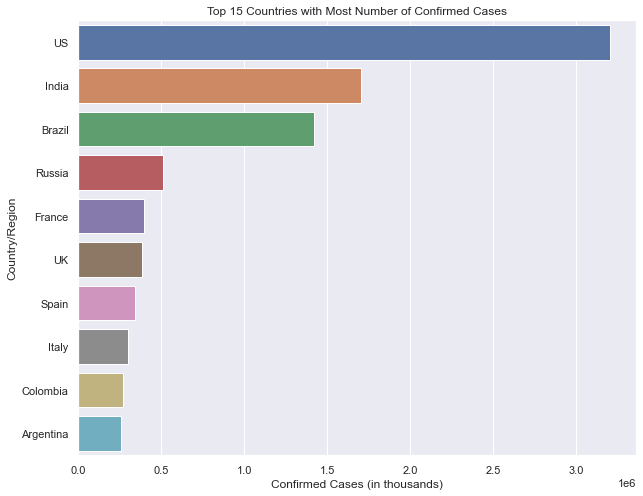

In [149]:
bar = sns.barplot(data=top_country, x="Confirmed (in thousands)", y="Country/Region")
bar.set_title("Top 15 Countries with Most Number of Confirmed Cases")
bar.set_xlabel("Confirmed Cases (in thousands)")

From the graph above, we can see that majority of the confirmed cases are from the United States of America. Majority of this list also belong to countries with large population.

<h4>A closer look at the countries with highest COVID-19 Cases</h4>

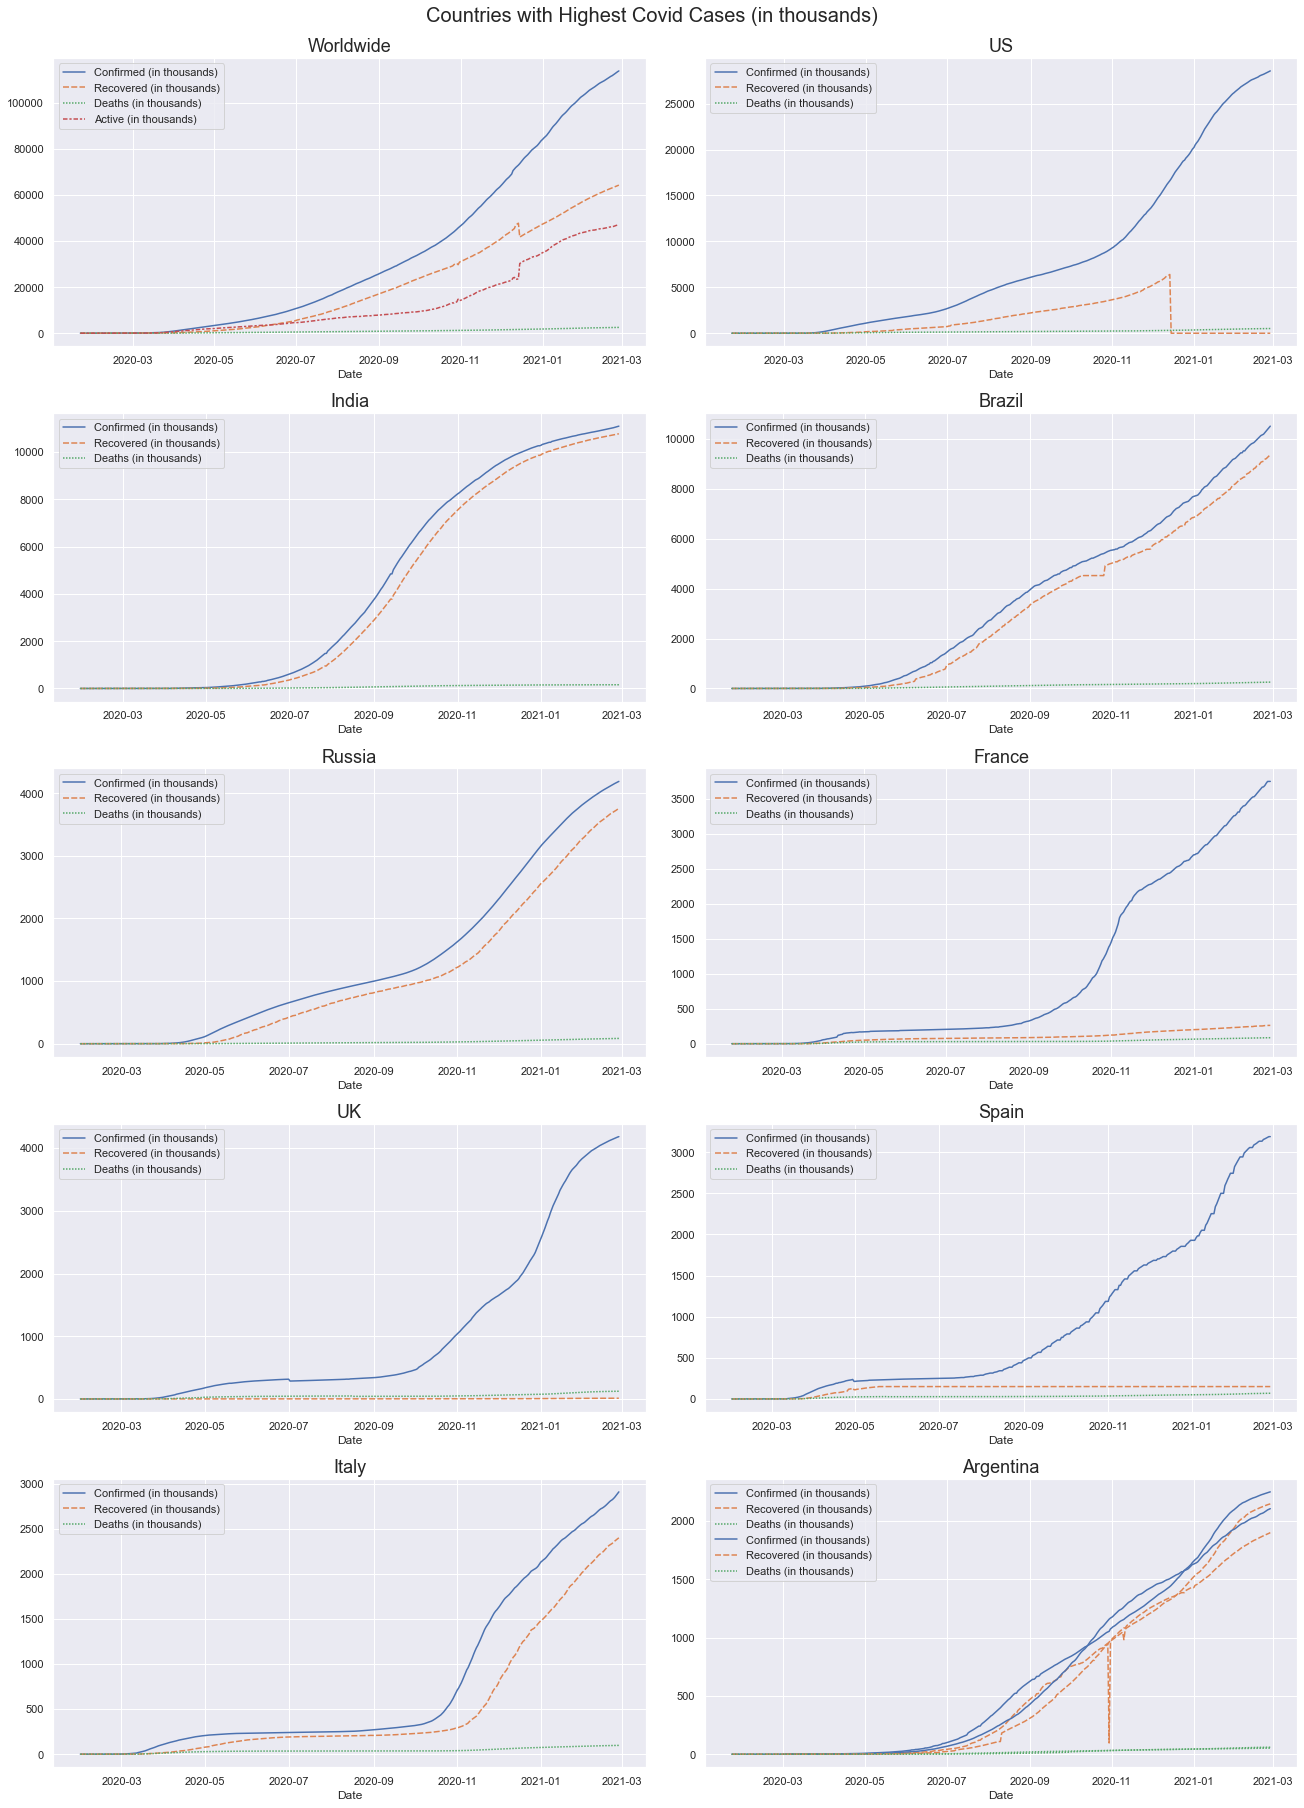

In [150]:
fig, axes = plt.subplots(5, 2, figsize=(18, 25),constrained_layout=True)

fig.suptitle('Countries with Highest Covid Cases (in thousands)',fontsize=20)
p1 = sns.lineplot(ax=axes[0, 0], data=groupdate).set_title('Worldwide',fontsize=18)
p2 = sns.lineplot(ax=axes[0, 1], data=top_country_agg[top_country_agg['Country/Region']=='US']).set_title('US',fontsize=18)
p3 = sns.lineplot(ax=axes[1, 0], data=top_country_agg[top_country_agg['Country/Region']=='India']).set_title('India',fontsize=18)
p4 = sns.lineplot(ax=axes[1, 1], data=top_country_agg[top_country_agg['Country/Region']=='Brazil']).set_title('Brazil',fontsize=18)
p5 = sns.lineplot(ax=axes[2, 0], data=top_country_agg[top_country_agg['Country/Region']=='Russia']).set_title('Russia',fontsize=18)
p6 = sns.lineplot(ax=axes[2, 1], data=top_country_agg[top_country_agg['Country/Region']=='France']).set_title('France',fontsize=18)
p7 = sns.lineplot(ax=axes[3, 0], data=top_country_agg[top_country_agg['Country/Region']=='UK']).set_title('UK',fontsize=18)
p8 = sns.lineplot(ax=axes[3, 1], data=top_country_agg[top_country_agg['Country/Region']=='Spain']).set_title('Spain',fontsize=18)
p9 = sns.lineplot(ax=axes[4, 0], data=top_country_agg[top_country_agg['Country/Region']=='Italy']).set_title('Italy',fontsize=18)
p10 = sns.lineplot(ax=axes[4, 1], data=top_country_agg[top_country_agg['Country/Region']=='Colombia']).set_title('Colombia',fontsize=18)
p10 = sns.lineplot(ax=axes[4, 1], data=top_country_agg[top_country_agg['Country/Region']=='Argentina']).set_title('Argentina',fontsize=18)

plot = plt.setp(axes, xlabel='Date',ylabel='')

As we can see on the graphs above, The recovery rate for US, UK, France, and Spain is very poor while the ones from India, Brazil, Russia, and Argentina are somehow impressive despite having a very large amount of confirmed cases. This says a lot about how each of these countries are managing the widespread virus in their country. We could also see that despite belonging to first world countries, nations could still perform poorly in handling a pandemic.

<h4>Countries with Highest Death Rate</h4>

In [194]:
#sort the death rate in descending order
death_country= sum_country.sort_values(by=['DeathPercent'],ascending=False)

#get the top countries
top_death = death_country.head(15)
top_death_list = top_death['DeathPercent'].to_list()

top_death_data = data[data['Country/Region'].isin(top_death_list)]
top_death_agg = top_country_data.groupby(['Country/Region','ObservationDate']).sum().reset_index().set_index('ObservationDate')
top_death

,index,Country/Region,Confirmed (in thousands),Recovered (in thousands),Deaths (in thousands),DeathPercent,RecoveryPercent
155,221,Yemen,506.009,303.050,144.616,28.579729,59.890239
189,119,MS Zaandam,3.005,0.609,0.666,22.163062,20.266223
11,133,Mexico,253255.086,197349.114,24061.279,9.500808,77.925035
36,57,Ecuador,42557.363,33867.920,2922.129,6.866330,79.581811
102,193,Sudan,4654.679,2627.611,288.711,6.202597,56.450960
129,197,Syria,1641.056,751.959,95.275,5.805713,45.821654
156,38,Chad,463.669,383.989,26.567,5.729734,82.815327
51,58,Egypt,30498.261,22546.442,1671.645,5.481116,73.926976
158,114,Liberia,387.768,306.153,21.048,5.427988,78.952621
45,22,Bolivia,34761.242,24279.605,1835.270,5.279644,69.846771


<h4>Countries with Highest Recovery Rate</h4>

In [195]:
#sort the death rate in descending order
recover_country= sum_country.sort_values(by=['RecoveryPercent'],ascending=False)

#get the top countries
top_recover = recover_country.head(15)
top_recover_list = top_recover['RecoveryPercent'].to_list()

top_recover_data = data[data['Country/Region'].isin(top_recover_list)]
top_recover_agg = top_country_data.groupby(['Country/Region','ObservationDate']).sum().reset_index().set_index('ObservationDate')
top_recover

,index,Country/Region,Confirmed (in thousands),Recovered (in thousands),Deaths (in thousands),DeathPercent,RecoveryPercent
84,215,Uzbekistan,14242.331,13322.305,111.562,0.783313,93.540201
69,14,Bahrain,18995.046,17735.216,69.370,0.365200,93.367586
131,53,Djibouti,1545.688,1441.449,16.118,1.042772,93.256142
162,52,Diamond Princess,242.080,224.971,4.370,1.805188,92.932502
44,163,Qatar,35330.197,32820.078,55.813,0.157975,92.895259
18,40,Chile,133260.141,123618.110,3471.871,2.605333,92.764505
85,75,Ghana,12523.953,11600.467,78.094,0.623557,92.626242
153,144,New Zealand,604.139,558.708,7.444,1.232167,92.480042
178,26,Brunei,51.553,47.414,0.871,1.689523,91.971369
106,121,Madagascar,3816.218,3504.943,52.519,1.376205,91.843364


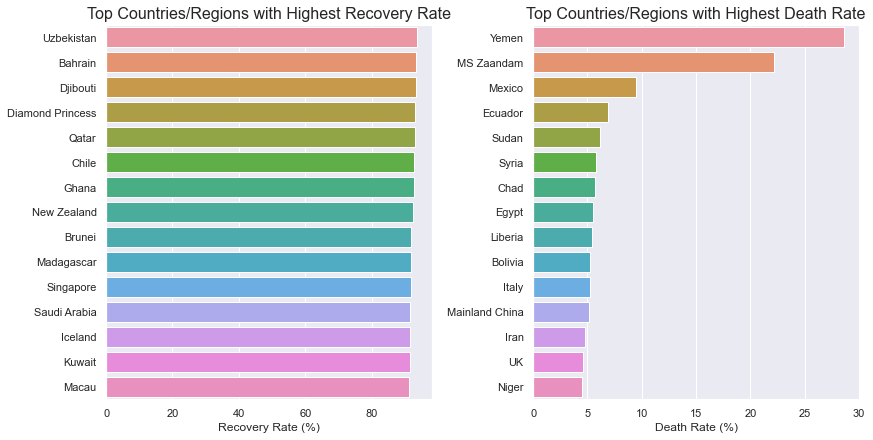

In [196]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6),constrained_layout=True)

bar1 = sns.barplot(ax=axes[0] ,data=top_recover, x="RecoveryPercent", y="Country/Region").set_title("Top Countries/Regions with Highest Recovery Rate",fontsize=16)
bar2 = sns.barplot(ax=axes[1], data=top_death, x="DeathPercent", y="Country/Region").set_title("Top Countries/Regions with Highest Death Rate",fontsize=16)
plot = plt.setp(axes[0], xlabel='Recovery Rate (%)',ylabel='')
plot = plt.setp(axes[1], xlabel='Death Rate (%)',ylabel='')

From here, we could see that countries with the highest death rate and recovery rate are a mix of developed and developing countries. In this analysis and visualization, we can conclude that the wealth of a country is not really an issue as to how effectively a country will handle a global pandemic.